# DATA CLEANING NOTEBOOK

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
missing = [' ']
data = pd.read_csv('census_18.csv',na_values = missing)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8363 entries, 0 to 8362
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8360 non-null   object
 1   Street                         8363 non-null   object
 2   First Name                     8362 non-null   object
 3   Surname                        8360 non-null   object
 4   Age                            8361 non-null   object
 5   Relationship to Head of House  8362 non-null   object
 6   Marital Status                 6386 non-null   object
 7   Gender                         8361 non-null   object
 8   Occupation                     8363 non-null   object
 9   Infirmity                      8356 non-null   object
 10  Religion                       6334 non-null   object
dtypes: object(11)
memory usage: 718.8+ KB


In [3]:
data.isnull().sum()

House Number                        3
Street                              0
First Name                          1
Surname                             3
Age                                 2
Relationship to Head of House       1
Marital Status                   1977
Gender                              2
Occupation                          0
Infirmity                           7
Religion                         2029
dtype: int64

# HOUSE NUMBER COLUMN

In [4]:
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', 'Six', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', 'Seventy Three', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', '128', '129', '130', '131', '132', '133', '134',
       '135', '136', '137', '138', '139', nan, '73', '140', '

### change all string occurences to numbers

In [5]:
data['House Number'].replace('Six',6,inplace=True)
data['House Number'].replace('thirty',30,inplace=True)
data['House Number'].replace('sixty-eight',68,inplace=True)
data['House Number'].replace('Seventy Three',73,inplace=True)

### Transform to int and replace missing values

In [6]:
data['House Number'] = pd.to_numeric(data['House Number']).astype('Int64')
#replace missing values
data[data['House Number'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1994,<NA>,Shallowtide Keys,Abdul,James,61,Sibling,Divorced,Male,Private music teacher,None,Christian
2022,<NA>,52 Shallowtide Keys,Jason,Griffiths,35,Partner,Single,Male,Actor,None,None
7330,<NA>,Jones Street,Eleanor,Carter,22,Head,Single,Female,University Student,None,None


In [7]:
data.iloc[1990:2000]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1990,44,Shallowtide Keys,Natalie,West,12,Daughter,NaN,Female,Student,None,NaN
1991,44,Shallowtide Keys,Wayne,West,9,Son,NaN,Male,Student,None,NaN
1992,45,Shallowtide Keys,Samuel,Williams,34,Head,Single,Male,"Nurse, learning disability",None,None
1993,45,Shallowtide Keys,Angela,Williams-Taylor,32,Partner,Single,Female,Pathologist,None,None
1994,<NA>,Shallowtide Keys,Abdul,James,61,Sibling,Divorced,Male,Private music teacher,None,Christian
1995,45,Shallowtide Keys,Susan,Thorpe,37,Cousin,Single,Female,"Scientist, marine",None,None
1996,45,Shallowtide Keys,Bethany,Norton,56,Lodger,Single,Female,Outdoor activities/education manager,None,None
1997,45,Shallowtide Keys,Marcus,Wilson,18,Lodger,Divorced,Male,Student,None,NaN
1998,46,Shallowtide Keys,Ross,O'Neill,33,Head,Married,Male,Unemployed,None,None
1999,46,Shallowtide Keys,Natasha,O'Neill,30,Wife,Married,Female,Museum/gallery conservator,None,None


In [8]:
# change the missing value
data.iat[1994,0] = 45

### The house number in the second missing value was part of the street number so we'll will input it from  there

In [9]:
data.iat[2022,0] = 52
data.iat[2022,1] = 'Shallowtide Keys'

### The last missing value

In [10]:
data.iloc[7326:7333]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7326,86,Jones Street,Hazel,Griffiths,57,Head,Single,Female,Museum/gallery conservator,None,Christian
7327,86,Jones Street,Brandon,Poole,67,Partner,Single,Male,Early years teacher,None,Christian
7328,87,Jones Street,Eleanor,Kaur,73,Head,Widowed,Female,Retired Ship broker,None,None
7329,88,Jones Street,Brenda,Howard,50,Head,Single,Female,Higher education careers adviser,None,Methodist
7330,<NA>,Jones Street,Eleanor,Carter,22,Head,Single,Female,University Student,None,None
7331,90,Jones Street,Lesley,Brown,55,Head,Divorced,Female,Unemployed,None,None
7332,90,Jones Street,Jonathan,Brown,2,Son,NaN,Male,Child,None,NaN


In [11]:
#change the house number to 89
data.iat[7330,0] = 89

# FIRST NAME VARIABLE

In [12]:
data[data['First Name'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
869,3,Haymarketcrack Street,NaN,Natasha Bishop,40,Daughter,Divorced,Female,"Designer, multimedia",None,None


### change surname to bishop and change first name to natasha

In [13]:
data.iat[869,2] = 'Natasha'
data.iat[869,3] = 'Bishop'

# SURNAME VARIABLE

In [14]:
data[data['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1949,33,Shallowtide Keys,Ashley,NaN,34,Lodger,Single,Male,Horticultural therapist,None,Methodist
4082,7,Ripon Meadows,Lesley,NaN,21,Head,Married,Female,University Student,None,None
4304,27,June Avenue,Cameron Marsden,NaN,18,Son,Divorced,Male,Student,None,None


### try to infer surnames from the household

### for first missing value

In [15]:
data.iloc[1944:1953]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1944,32,Shallowtide Keys,Mark,Bailey,20,Lodger,Single,Male,University Student,None,Christian
1945,32,Shallowtide Keys,Stanley,Smith,24,Lodger,Single,Male,Control and instrumentation engineer,None,Muslim
1946,33,Shallowtide Keys,Kim,Hilton,29,Head,Married,Female,"Lighting technician, broadcasting/film/video",None,None
1947,33,Shallowtide Keys,Benjamin,Hilton,30,Husband,Married,Male,Operational researcher,None,None
1948,33,Shallowtide Keys,Mohammad,White-Hilton,1,Son,NaN,Male,Child,None,NaN
1949,33,Shallowtide Keys,Ashley,NaN,34,Lodger,Single,Male,Horticultural therapist,None,Methodist
1950,34,Shallowtide Keys,Christopher,Wilkins,71,Head,Widowed,Male,Retired Curator,None,Catholic
1951,34,Shallowtide Keys,Shane,Page,23,Grandson,Divorced,Male,Lexicographer,None,Catholic
1952,34,Shallowtide Keys,Karl,Morgan,19,Grandson,Single,Male,University Student,None,None


### change surname to hilton

In [16]:
data.iat[1949,3] = 'Hilton'

### for second missing value

In [17]:
data.iloc[4080:4088]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4080,6,Ripon Meadows,Colin,May,18,Son,Single,Male,Student,None,None
4081,6,Ripon Meadows,Diane,May,11,Daughter,NaN,Female,Student,None,NaN
4082,7,Ripon Meadows,Lesley,NaN,21,Head,Married,Female,University Student,None,None
4083,7,Ripon Meadows,Arthur,Griffiths,23,Husband,Married,Male,Unemployed,None,None
4084,7,Ripon Meadows,Elaine,Griffiths,4,Daughter,NaN,Female,Child,None,NaN
4085,8,Ripon Meadows,Kim,Brown,45,Head,Single,Female,Further education lecturer,None,None
4086,8,Ripon Meadows,Rosemary,Brown,16,Daughter,NaN,Female,Student,None,NaN
4087,9,Ripon Meadows,Denise,Baldwin,57,Head,Single,Female,Soil scientist,None,Christian


### change surname to griffiths

In [18]:
data.iat[4082,3,] = 'Griffiths'

### change surname to marsden and first name to cameron

In [19]:
data.iat[4304,2] = 'Cameron'
data.iat[4304,3] = 'Marsden'

### for last two missing values

# AGE VARIABLE

In [20]:
data['Age'].unique()

array(['50', '54', '21', '22', '48', '83', '47', '12', '49', '8', '70',
       '72', '74', '81', '41', '42', '80', '19', '20', '46', '14', '73',
       '75', '67', '64', '23', '33', '51', '28', '57', '44', '43', '56',
       '39', '55', '31', '82', '32', '29', '18', '36', '40', '9', '13',
       '11', '7', '4', '52', '5', '63', '16', '58', '24', '35', '98',
       '69', '59', '53', '45', '17', '1', '10', '87', '84', '85', '60',
       '76', '25', '79', '78', '88', '68', '37', '30', '66', '62', '38',
       '27', '34', '61', '71', '77', '26', '15', '6', '2', '3', '86',
       '89', '0', '65', '0.5', nan, '96', '-1', '520', 'twenty', '101',
       '93', '51.19016704', '53.19016704', '99', '97', '60.1841585',
       '65.1841585', '94', '105', '92', '104', '109', '53.62129809',
       '16.5', '90', '66.33414231', '100', '102', '65.4677806',
       '68.4677806', '40.5', '85.56434732', '81.56434732', '103'],
      dtype=object)

### replace string with numbers

In [21]:
data['Age'].replace('twenty',20,inplace=True)

### figure out which rows have 0 and -1 as age

In [22]:
data[data['Age'] =='0']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
446,14,Tannery Land,Aimee,Patel,0,Daughter,NaN,Female,Child,None,NaN
532,41,Tannery Land,Michelle,Thomas,0,Daughter,NaN,Female,Child,Physical Disability,NaN
554,48,Tannery Land,Robin,Barlow,0,Son,NaN,Male,Child,None,NaN
585,1,Oak Drive,Maureen,Hill,0,Daughter,NaN,Female,Child,None,NaN
606,5,Oak Drive,Frank,Owen,0,Nephew,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8170,9,Edwards Mountain,Kevin,Wilson,0,Son,NaN,Male,Child,None,NaN
8254,20,Scott Drive,Hilary,Walker-Gardner,0,Daughter,NaN,Female,Child,None,NaN
8291,1,Gardiner Haven,Peter,Taylor,0,Son,NaN,Male,Child,None,NaN
8327,1,Evans Farm,Lynn,Armstrong,0,Daughter,NaN,Female,Child,None,NaN


### since both ages  are children, we'll change -1 to 0

In [23]:
data.iat[1972,4] = 0

### next to convert the variable to int

In [24]:
data['Age'] = np.floor(pd.to_numeric(data['Age'],errors='coerce')).astype('Int64')


### next we'll check for any outliers in the variable

<AxesSubplot:xlabel='Age'>

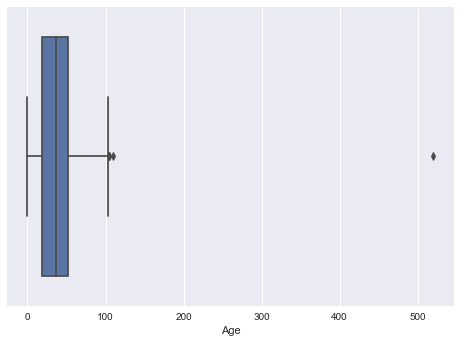

In [25]:
sns.boxplot(x=data['Age'])

### we can see there's an outlier whose age is above 500. this is obviously a lie so we will look into it.

In [26]:
data[data.Age >500]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2019,51,Shallowtide Keys,Marion,Thompson,520,Head,Single,Female,Unemployed,None,Christian


### we'll have to look into the household to try and infer the real age of this person

In [27]:
data[(data['House Number'] == 51) & (data.Street == 'Shallowtide Keys')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2019,51,Shallowtide Keys,Marion,Thompson,520,Head,Single,Female,Unemployed,None,Christian
2020,51,Shallowtide Keys,Lesley,Thompson,23,Daughter,Single,Female,"Engineer, maintenance (IT)",None,Christian


### This person is most likely an elderly person who lives with her daughter. We will change her age to the next maximum age

In [28]:
#first sort the dataframe by age
by_age = data.sort_values(by='Age')
by_age
#second to last age is 109 so we'll replace the outlier with that
data.loc[data.Age>500,'Age'] = 109

### replace missing values with median age

In [29]:
data['Age'].fillna(data['Age'].median(),inplace=True)   

# RELATIONSHIP TO HEAD OF HOUSE VARAIBLE

In [30]:
data['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'Granddaughter', 'Step-Son',
       'Wife', 'None', 'Partner', 'Lodger', 'Adopted Daughter',
       'Grandson', 'Sibling', 'Cousin', 'Step-Daughter', 'Visitor',
       'Nephew', nan, 'Neice', 'Adopted Son', 'Adopted Granddaughter',
       'Son-in-law'], dtype=object)

### correct misspelt values

In [31]:
data['Relationship to Head of House'].replace('Neice','Niece',inplace=True)

### replace missing values

In [32]:
data['Relationship to Head of House'].fillna(data['Relationship to Head of House'].mode()[0],inplace=True)

# MARITAL STATUS VARIABLE

In [33]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', nan, 'Widowed', 'Marrie d',
       'divorced', 'single'], dtype=object)

### handled  misspelt values

In [34]:
data['Marital Status'].replace('divorced','Divorced',inplace=True)
data['Marital Status'].replace('Marrie d','Married',inplace=True)
data['Marital Status'].replace('single','Single',inplace=True)

### Next, we'll make a boxplot to see the distribution of marital statuses based on ages

<AxesSubplot:xlabel='Marital Status', ylabel='Age'>

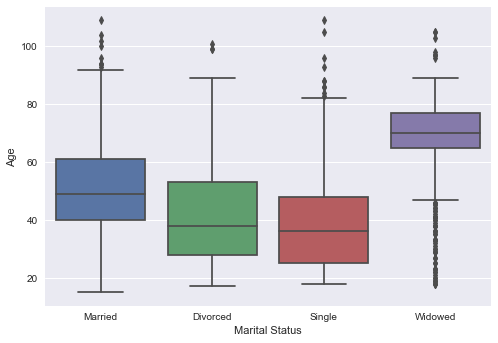

In [35]:
sns.boxplot(x='Marital Status', y= 'Age', data=data)

### we can see that there are some 'widowed' citizens under the age of 20. we will have to look into this to know if they are mistakes or not


In [36]:
data[(data['Marital Status'] == 'Widowed') & (data['Age']<20)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
188,114,Lomond Ville,Diane,Miles,19,Head,Widowed,Female,University Student,None,Methodist
405,54,Fisher Street,Rita,Pearson,19,Granddaughter,Widowed,Female,University Student,None,None
1918,23,Shallowtide Keys,Eileen,Young,19,Daughter,Widowed,Female,University Student,None,None
3466,32,Ahmed Lane,Charlie,Wood,18,Head,Widowed,Male,Student,None,NaN
5441,14,Trentpull Lane,Mark,Ball,18,Son,Widowed,Male,Student,None,None
7894,112,Stoke Trafficway,Stephanie,Lane,18,Daughter,Widowed,Female,Student,None,None


### it is highly improbable that the records above are actually widowed, so we'll change their status to 'Single' instead

In [37]:
data.loc[(data['Marital Status'] == 'Widowed') & (data['Age'] <20), 'Marital Status'] = 'Single'

### Next, we will check if there are any children who have single as their marriage status

In [38]:
data[(data['Marital Status'] == 'Single') & (data['Age'] <16)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### since there are no 'single' kids, we can proceed to replace missing values

### Next, we have to check if there are any adults who have a missing marital status

In [39]:
data[(data['Marital Status'].isnull()) & (data['Age'] >16)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
112,64,Lomond Ville,Dominic,Iqbal,17,Son,NaN,Male,Student,None,NaN
522,37,Tannery Land,Ronald,Graham,17,Step-Son,NaN,Male,Student,None,NaN
540,43,Tannery Land,Molly,Todd,17,Daughter,NaN,Female,Student,None,NaN
591,2,Oak Drive,Lewis,King,17,Son,NaN,Male,Student,None,NaN
831,14,Allen Road,Callum,Noble,17,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7804,85,Stoke Trafficway,June,Cross,17,Daughter,NaN,Female,Student,None,NaN
8134,25,Burgess Drive,Laura,Dodd,17,Daughter,NaN,Female,Student,None,NaN
8199,20,Edwards Mountain,Diana,Wilkins,17,Granddaughter,NaN,Female,Student,None,NaN
8296,1,Egbert Palace,Glen,Barber,17,Son,NaN,Male,Student,None,NaN


### replace the above with the mode

In [40]:
data.iat[6671,6] = data['Marital Status'].mode()[0]
data.iloc[6671]

House Number                                42
Street                           Barnes Garden
First Name                               Chloe
Surname                               Williams
Age                                         48
Relationship to Head of House             Head
Marital Status                          Single
Gender                                  Female
Occupation                       Stage manager
Infirmity                                 None
Religion                             Christian
Name: 6671, dtype: object

### next, show the missing values

In [41]:
data[data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8,6,Lomond Ville,Natalie,Davis,12,Daughter,NaN,Female,Student,None,NaN
11,7,Lomond Ville,Marc,Brown,8,Son,NaN,Male,Student,None,NaN
14,8,Lomond Ville,Ruth,King,12,Granddaughter,NaN,Female,Student,None,NaN
17,10,Lomond Ville,Thomas,Franklin,12,Step-Son,NaN,Male,Student,None,NaN
28,16,Lomond Ville,Edward,Hudson-Johnson,14,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8353,1,Palmer Lodge,Janice,Robson,11,Daughter,NaN,Female,Student,None,NaN
8354,1,Palmer Lodge,Henry,Robson,6,Son,NaN,Male,Student,None,NaN
8355,1,Palmer Lodge,Luke,Robson,5,Son,NaN,M,Student,None,NaN
8356,1,Palmer Lodge,Natalie,Robson,3,Daughter,NaN,Female,Child,None,NaN


### replace the kid's marital status with 'Not applicable'

In [42]:
data['Marital Status'].fillna('Not Applicable',inplace=True)

# GENDER VARIABLE

In [43]:
data['Gender'].unique()

array(['Female', 'Male', 'M', 'MALE', 'Fem', 'Fem-ale', 'MAL E',
       'Fem ale', 'male', 'Male-', 'fem', nan, 'Fe-male', 'F', 'FEMALE'],
      dtype=object)

### correct misspelt variations

In [44]:
#male
data['Gender'].replace('M','Male',inplace=True)
data['Gender'].replace('MALE','Male',inplace=True)
data['Gender'].replace('MAL E','Male',inplace=True)
data['Gender'].replace('male','Male',inplace=True)
data['Gender'].replace('Male-','Male',inplace=True)

#female
data['Gender'].replace('Fem','Female',inplace=True)
data['Gender'].replace('Fem-ale','Female',inplace=True)
data['Gender'].replace('F','Female',inplace=True)
data['Gender'].replace('FEMALE','Female',inplace=True)
data['Gender'].replace('Fem ale','Female',inplace=True)
data['Gender'].replace('fem','Female',inplace=True)
data['Gender'].replace('Fe-male','Female',inplace=True)

### replace missing values by inferring from name

In [45]:
data[data['Gender'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5300,32,Begum Ports,Jay,Foster,54,Husband,Married,NaN,Health service manager,None,Methodist
5933,8,Clementine Drive,Ronald,Ellis,69,Husband,Married,NaN,Retired Web designer,None,None


### replace missing values with male since they are both men

In [46]:
data['Gender'].fillna('Male',inplace=True)

## OCCUPATION

### check individuals of retirement age who are unemployed

In [47]:
data[(data['Occupation'] =='Unemployed') & (data['Age']>65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
149,89,Lomond Ville,Karen,Robinson,79,Head,Divorced,Female,Unemployed,None,None
189,115,Lomond Ville,Roger,Evans,74,Head,Widowed,Male,Unemployed,None,Methodist
472,22,Tannery Land,Colin,Parkinson,81,Husband,Married,Male,Unemployed,None,Christian
759,15,Dublinbranch Road,Natasha,Potter,82,Head,Widowed,Female,Unemployed,None,Christian
867,3,Haymarketcrack Street,Rachael,Bishop,71,Head,Divorced,Female,Unemployed,None,Christian
1182,16,Webster Common,Lee,Matthews,70,Head,Divorced,Male,Unemployed,None,Christian
1870,11,Shallowtide Keys,Frederick,Bibi,77,Head,Widowed,Male,Unemployed,None,Sikh
2019,51,Shallowtide Keys,Marion,Thompson,109,Head,Single,Female,Unemployed,None,Christian
2530,29,Henderson Prairie,Elizabeth,White,72,Head,Widowed,Female,Unemployed,None,None
2962,11,Brown Centers,Hazel,Barker,67,Head,Widowed,Female,Unemployed,None,Christian


### Change their occupation to retired

In [48]:
data.loc[(data.Occupation == 'Unemployed') & (data.Age>65), 'Occupation'] = 'Retired'

# INFIRMITY

In [49]:
data['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Mental Disability', 'Deaf',
       'Physical Disability', 'Blind', 'Disabled', nan], dtype=object)

### Infirmity has a Disabled value which is different from Mental Disability and Physical Disability.  We will merge it with Physical Disability because it is a common synonym used to describe physical disability

In [50]:
data['Infirmity'].replace('Disabled','Physical Disability',inplace=True)


### replace missing values with the mode

In [51]:
data[data['Infirmity'].isnull()]
#handle missing values
data['Infirmity'].fillna(data['Infirmity'].mode()[0],inplace=True)

# RELIGION

In [52]:
data['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Methodist', nan, 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Cat holic', 'Undecided', 'Orthodoxy',
       'Nope', 'Quaker'], dtype=object)

### correct misspelt values, and merge Nope with None

In [53]:
data['Religion'].replace('Cat holic','Catholic',inplace=True)
data['Religion'].replace('Nope','None',inplace=True)

### next check how many people are undecided to know how to handle it

In [54]:
data[data['Religion'] =='Undecided']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2336,139,Shallowtide Keys,Steven,Parker,27,Head,Divorced,Male,Animal nutritionist,None,Undecided


### since there is only one undecided instance, it will be merged with None

In [55]:
data['Religion'].replace('Undecided','None',inplace=True)

### Check the frequencies of the lesser religions

In [56]:
data[data['Religion'] =='Quaker']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8185,15,Edwards Mountain,Terence,Evans,27,Head,Single,Male,Maintenance engineer,None,Quaker


### Since there is only one person, they will be replaced with the mode

In [57]:
data['Religion'].replace('Quaker',data['Religion'].mode()[0],inplace=True)

## Replacing missing values.
### first check if there are any adults missing a religion and change them to the mode

In [58]:
data[(data['Religion'].isnull()) & (data['Age']>16)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
59,37,Lomond Ville,Darren,Clark,18,Head,Single,Male,Student,None,NaN
112,64,Lomond Ville,Dominic,Iqbal,17,Son,Not Applicable,Male,Student,None,NaN
122,70,Lomond Ville,Howard,Taylor,18,Head,Divorced,Male,Student,None,NaN
141,83,Lomond Ville,Denise,Clements,18,Head,Divorced,Female,Student,None,NaN
522,37,Tannery Land,Ronald,Graham,17,Step-Son,Not Applicable,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7804,85,Stoke Trafficway,June,Cross,17,Daughter,Not Applicable,Female,Student,None,NaN
8134,25,Burgess Drive,Laura,Dodd,17,Daughter,Not Applicable,Female,Student,None,NaN
8199,20,Edwards Mountain,Diana,Wilkins,17,Granddaughter,Not Applicable,Female,Student,None,NaN
8296,1,Egbert Palace,Glen,Barber,17,Son,Not Applicable,Male,Student,None,NaN


### Fill all the missing values of nulls above 16 with the mode


In [59]:
data.loc[(data['Religion'].isnull()) & (data['Age']>16),'Religion'] = data.Religion.mode()[0]

### Fill the missing values of all under 16 by creating a new category for them called 'Not Applicable'

In [60]:
data['Religion'].fillna('Not Applicable',inplace=True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8363 entries, 0 to 8362
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8363 non-null   Int64 
 1   Street                         8363 non-null   object
 2   First Name                     8363 non-null   object
 3   Surname                        8363 non-null   object
 4   Age                            8363 non-null   Int64 
 5   Relationship to Head of House  8363 non-null   object
 6   Marital Status                 8363 non-null   object
 7   Gender                         8363 non-null   object
 8   Occupation                     8363 non-null   object
 9   Infirmity                      8363 non-null   object
 10  Religion                       8363 non-null   object
dtypes: Int64(2), object(9)
memory usage: 735.2+ KB


### save cleaned dataframe to new file

In [62]:
data.to_csv('clean_dataframe.csv', encoding='utf-8', index=False)